In [1]:
# Import dependencies #

import altair as alt
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif


weather_by_date = pd.read_csv('full_weather_data.csv')
weather_by_date.head()

,datetime,dew,humidity,precip,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon,Region,Tornado,Temp_Difference
0,2019-01-01,31.4,91.4,0.583,21.9,11.4,315.9,1024.8,99.5,5.6,15.3,1.2,1.0,"Snow, Rain, Overcast",rain,OHIO VALLEY,0,7.1
1,2019-01-03,43.2,89.2,0.172,0.0,8.6,250.5,1016.9,65.9,8.0,32.0,2.6,1.0,"Rain, Partially cloudy",rain,SOUTHEAST,0,14.0
2,2019-01-04,50.1,85.9,1.227,34.2,18.9,207.4,1008.9,77.6,6.5,70.3,5.9,6.0,"Rain, Partially cloudy",rain,SOUTHEAST,1,19.6
3,2019-01-07,31.0,71.6,0.064,51.4,18.5,234.9,1017.4,68.7,9.0,26.8,2.3,2.0,"Rain, Partially cloudy",snow,WEST,0,8.9
4,2019-01-08,34.4,87.7,0.151,23.0,8.6,108.0,1013.3,94.2,5.9,627.6,53.9,1.0,"Snow, Rain, Overcast",rain,NORTHEAST,1,9.6


In [2]:
numeric_columns = ['dew', 'humidity','precip', 'windgust','windspeed', 'winddir', 'pressure', 'cloudcover','visibility', 'solarradiation',
'solarenergy', 'uvindex', 'Temp_Difference']

corr_matrix = weather_by_date[numeric_columns].corr()

corr_matrix

,dew,humidity,precip,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,Temp_Difference
dew,1.000000,0.524658,0.239156,0.040320,-0.074262,-0.131635,-0.363249,0.171755,-0.118530,0.011216,0.011562,0.095121,-0.270295
humidity,0.524658,1.000000,0.413716,-0.064304,-0.073869,-0.104865,-0.133580,0.556113,-0.525895,-0.461765,-0.461565,-0.517988,-0.533198
precip,0.239156,0.413716,1.000000,0.243180,0.174564,-0.108363,-0.233437,0.363463,-0.441837,-0.275627,-0.276890,-0.299998,-0.297987
windgust,0.040320,-0.064304,0.243180,1.000000,0.715766,0.025615,-0.423921,0.118301,-0.024879,-0.018470,-0.018824,0.005466,-0.028002
windspeed,-0.074262,-0.073869,0.174564,0.715766,1.000000,0.056817,-0.396739,0.148534,0.005388,-0.087628,-0.087660,-0.070767,-0.046688
winddir,-0.131635,-0.104865,-0.108363,0.025615,0.056817,1.000000,-0.104107,-0.097322,0.066274,0.037699,0.038154,0.044182,0.080543
pressure,-0.363249,-0.133580,-0.233437,-0.423921,-0.396739,-0.104107,1.000000,-0.204393,0.119045,0.036058,0.035910,0.029384,0.137145
cloudcover,0.171755,0.556113,0.363463,0.118301,0.148534,-0.097322,-0.204393,1.000000,-0.444292,-0.527129,-0.526710,-0.569991,-0.630585
visibility,-0.118530,-0.525895,-0.441837,-0.024879,0.005388,0.066274,0.119045,-0.444292,1.000000,0.277640,0.278101,0.426311,0.324667
solarradiation,0.011216,-0.461765,-0.275627,-0.018470,-0.087628,0.037699,0.036058,-0.527129,0.277640,1.000000,0.999873,0.757347,0.438357


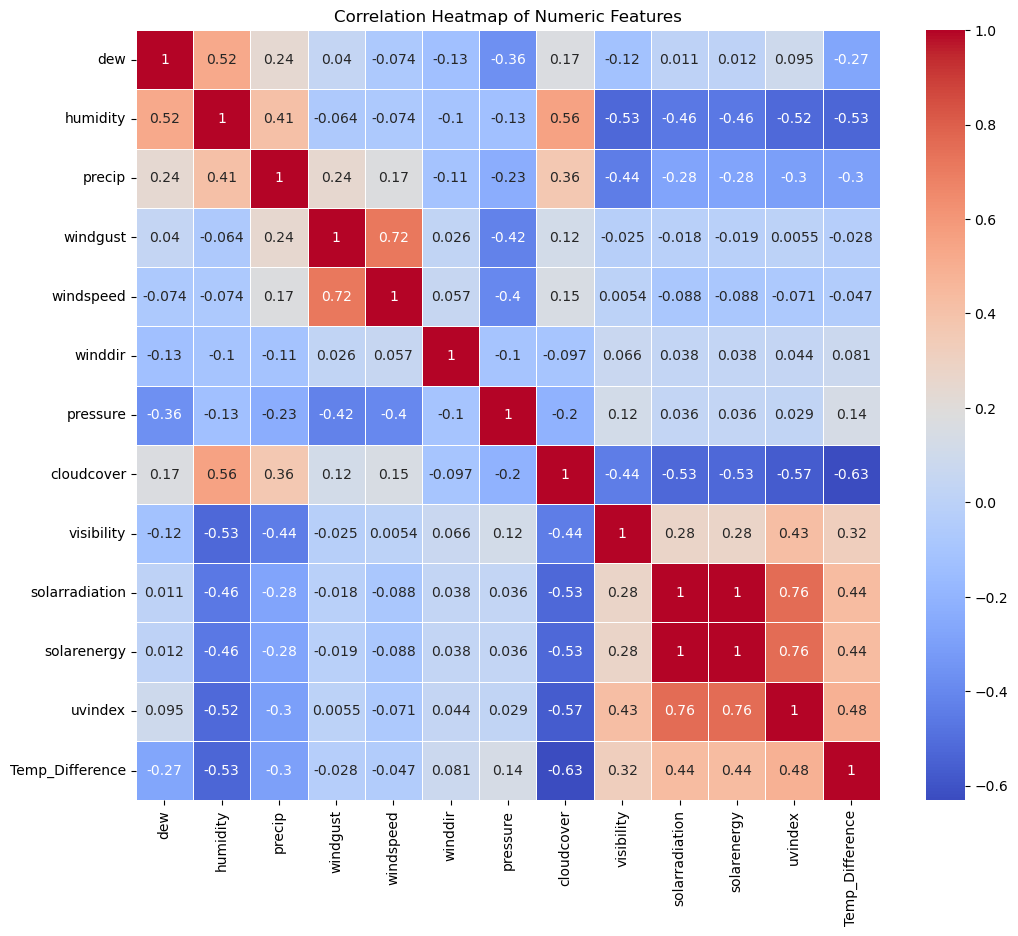

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

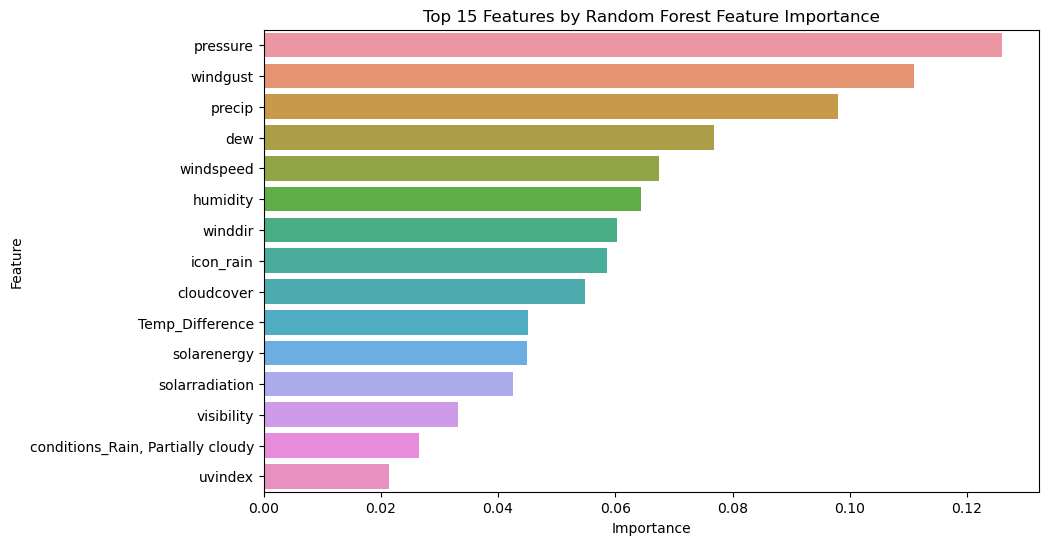

In [4]:
from sklearn.ensemble import RandomForestClassifier
X = weather_by_date.drop(['Tornado', 'datetime'], axis=1)  # Remove target and datetime
y = weather_by_date['Tornado']
X = pd.get_dummies(X, columns=['icon', 'Region', 'conditions'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


importance = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Features by Random Forest Feature Importance')
plt.show()

In [5]:
feature_selection = weather_by_date.drop(columns = ['solarradiation', 'Temp_Difference', 'solarenergy','visibility','conditions', 'uvindex'])

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



X = feature_selection.drop(['Tornado', 'datetime'], axis=1)
y = feature_selection['Tornado']

X = pd.get_dummies(X, columns=['Region', 'icon'])

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
scaler = StandardScaler()

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

class_weight = {0: 1, 1: 5} 
rf_model = RandomForestClassifier(
    n_estimators=500, 
    max_depth=None,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    class_weight=class_weight
)

rf_model.fit(X_train_scaled, y_train_resampled)

y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_custom = (y_pred_proba > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred_custom))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       172
           1       0.72      0.73      0.73        79

    accuracy                           0.82       251
   macro avg       0.80      0.80      0.80       251
weighted avg       0.83      0.82      0.83       251


Confusion Matrix:
[[149  23]
 [ 21  58]]

ROC AUC Score:
0.9039961730939063


In [26]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.81673307 0.81673307 0.83665339 0.844      0.816     ]
Mean CV score: 0.8260239043824701


In [27]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 important features:")
print(feature_importance.head(10))


Top 10 important features:
           feature  importance
0              dew    0.149906
6         pressure    0.136685
3         windgust    0.136152
4        windspeed    0.104501
5          winddir    0.091844
2           precip    0.082661
1         humidity    0.075184
7       cloudcover    0.067586
20       icon_rain    0.045893
17  icon_clear-day    0.022299


In [28]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}]
}

rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                               param_distributions=param_dist, 
                               n_iter=100, cv=5, verbose=2, 
                               random_state=42, n_jobs=-1,
                               scoring='recall')  # Focus on recall
rf_random.fit(X_train_scaled, y_train_resampled)

print("Best parameters:", rf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': {0: 1, 1: 5}}


In [29]:
y_pred_best = rf_random.predict(X_test_scaled)
y_pred_proba_best = rf_random.predict_proba(X_test_scaled)[:, 1]

print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))

print("\nBest Model ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_best))

print("\nBest Model Confusion Matrix")
print(confusion_matrix(y_test, y_pred_best))


Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       172
           1       0.58      0.90      0.71        79

    accuracy                           0.76       251
   macro avg       0.76      0.80      0.76       251
weighted avg       0.83      0.76      0.77       251


Best Model ROC AUC Score:
0.9072711215778628

Best Model Confusion Matrix
[[121  51]
 [  8  71]]
